In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
import os
import sys
import scipy.ndimage
import imageio

In [59]:
iTests = [50]
imgNorm = 0.15

In [60]:
# read references
with np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/paras_tikh_0.3.npz') as f:
    mask = f['mask'][iTests, ...]
    cbfFac = f['cbfFac']
    cbvFac = f['cbvFac']
aif = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/aif0.npy') / 1000 / imgNorm
ref = (np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_-1.npy')[iTests, ...] - 1) / imgNorm
img = (np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_200000.npy')[iTests, ...] - 1) / imgNorm

(-0.5, 191.5, 191.5, -0.5)

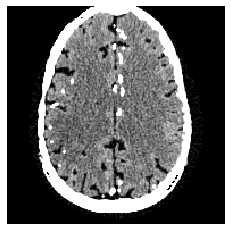

In [76]:
plt.imshow(img[0,32:-32,32:-32,20] * imgNorm, 'gray', vmin=-0, vmax=0.08)
plt.axis('off')

(-0.5, 191.5, 191.5, -0.5)

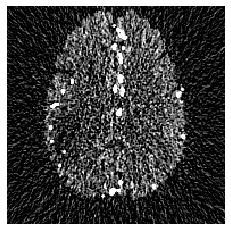

In [18]:
plt.imshow((img[0,32:-32,32:-32,19] + img[0,32:-32,32:-32,21]) / 2 - img[0,32:-32,32:-32,1] , 'gray', vmin=0, vmax=0.2)
plt.axis('off')

In [33]:
n2n = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/beta_12.5_N0_200000/tmp/iodines.npy')[iTests, ...].transpose(0, 2, 3, 1) * 0.025 / imgNorm

(-0.5, 191.5, 191.5, -0.5)

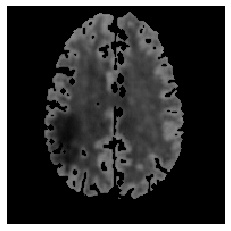

In [36]:
plt.imshow(n2n[0,32:-32,32:-32,21], 'gray', vmin=0, vmax=0.2)
plt.axis('off')

In [39]:
sys.path.append('../../Preprocess')
import CalcParaMaps

In [49]:
cbf, cbv, mtt = CalcParaMaps.CalcParaMaps(n2n, mask, kappa=1, rho=1, aif = np.copy(aif))
cbf *= cbfFac
cbv *= cbvFac
mtt = mtt * cbvFac / cbfFac
ttp = np.argmax(n2n, -1)

In [43]:
cmap = matplotlib.cm.jet(np.arange(256))
cmap[0, :-1] = 0
newCmap = matplotlib.colors.ListedColormap(cmap, 'perfusion', N=256)

(-0.5, 191.5, 191.5, -0.5)

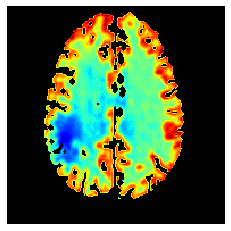

In [47]:
plt.imshow(cbf[0, 32:-32,32:-32], newCmap, vmin=0, vmax=50)
plt.axis('off')

(-0.5, 191.5, 191.5, -0.5)

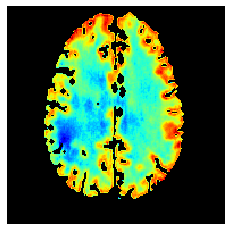

In [48]:
plt.imshow(cbv[0, 32:-32,32:-32], newCmap, vmin=0, vmax=4)
plt.axis('off')

(-0.5, 191.5, 191.5, -0.5)

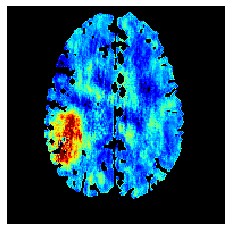

In [50]:
plt.imshow(mtt[0, 32:-32,32:-32], newCmap, vmin=3.5, vmax=7)
plt.axis('off')

(-0.5, 191.5, 191.5, -0.5)

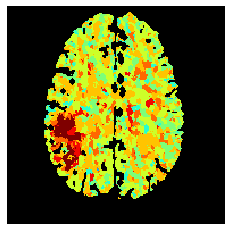

In [51]:
plt.imshow(ttp[0, 32:-32,32:-32], newCmap, vmin=15, vmax=25)
plt.axis('off')

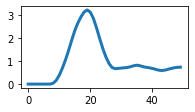

In [56]:
plt.figure(figsize=[3,1.5])
plt.plot(aif, lineWidth = 3)

In [77]:
real = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/real/data/imgs4d.npy', allow_pickle=True)

(-0.5, 191.5, 191.5, -0.5)

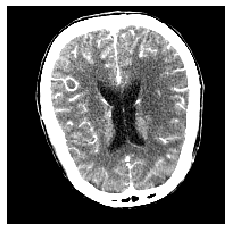

In [103]:
plt.imshow(real[3][1,32:-32,32:-32,20] / 1000, 'gray', vmin=-0, vmax=0.08)
plt.axis('off')